In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [5]:
male_mean=178
male_sd=7.7
female_mean=163
female_sd=7.3

In [6]:
male_height=stats.norm(male_mean,male_sd)
female_height=stats.norm(female_mean,female_sd)

In [7]:
def evaluation_pdf(rv,x=4):
    #evaluating the mean and standard deviation of every random variable in the distribution
    mean=rv.mean()
    sd=rv.std()
    #using numpy to calculate the evenly spaced numbers for the specified intervals
    xs=np.linspace(mean-x*sd,mean+x*sd)
    #calculate the peak of the normal distribution of the pdf
    yx=rv.pdf(xs)
    return xs,yx

Text(0.5, 0, 'height (cm)')

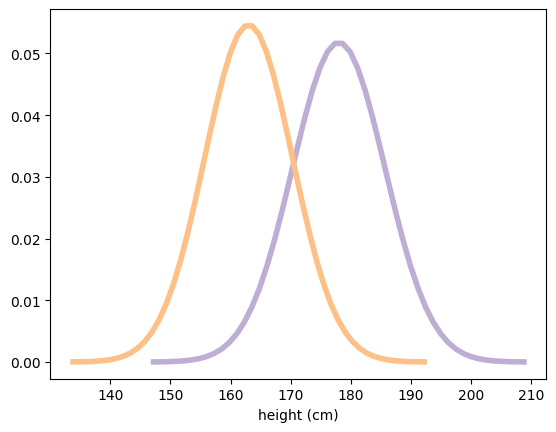

In [12]:
#Male height
xs, yx = evaluation_pdf(male_height)
plt.plot(xs, yx, label='male', linewidth=4, color='#beaed4') 
 
#Female height 
xs, yx = evaluation_pdf(female_height)
plt.plot(xs, yx, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

In [13]:
male_sample= male_height.rvs(1000)
female_sample= female_height.rvs(1000)

In [14]:
mean1,sd1=male_sample.mean(),male_sample.std()
mean1,sd1

(np.float64(177.85277679198737), np.float64(7.528147870971553))

In [15]:
mean2,sd2=female_sample.mean(),female_sample.std()
mean2,sd2

(np.float64(163.13667771169565), np.float64(7.353208744627112))

In [16]:
mean_difference=mean1-mean2
mean_difference

np.float64(14.716099080291713)

In [18]:
#quantifying the difference
#percentage of the mean... relative
relative_difference=mean_difference/(mean1)
percentage_difference=relative_difference*100
percentage_difference

np.float64(8.274315051883239)

In [20]:
relative_difference2=mean_difference/(mean2)
percentage_difference2=relative_difference2*100
percentage_difference2

np.float64(9.020717650201773)

In [21]:
simple_overlap_ratio=(mean1+mean2)/2
simple_overlap_ratio

np.float64(170.4947272518415)

In [23]:
overlap_ratio= (sd1*mean2+sd2*mean1)/(sd1+sd2)
overlap_ratio

np.float64(170.4082290385803)

In [30]:
#write a function cohen's d function
def cohensd(group1,group2):
    difference_mean=group1.mean()-group2.mean()
    n1=len(group1)
    n2=len(group2)
    v1=group1.var()
    v2=group2.var()
    pooled_variance=(n1*v1+n2*v2)/(n1+n2)
    pooled_std=np.sqrt(pooled_variance)
    d=difference_mean/pooled_std
    return d

In [31]:
#call the function
d=cohensd(male_sample,female_sample)
d

np.float64(1.9776533454912075)

In [33]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 2.3 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
df=pd.read_csv(r'IT_salaries.csv')
df.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


In [36]:
formula='S~ C(E) + C(M)+X'

In [37]:
lm = ols(formula, df).fit()

In [38]:
table=sm.stats.anova_lm(lm,typ=2)
table

,sum_sq,df,F,PR(>F)
C(E),9.152624e+07,2.0,43.351589,7.672450e-11
C(M),5.075724e+08,1.0,480.825394,2.901444e-24
X,3.380979e+08,1.0,320.281524,5.546313e-21
Residual,4.328072e+07,41.0,NaN,NaN


 A company ran three online ad campaigns — A, B, and C.
 You have conversion rates (%) from 10 cities for each campaign.
Task:
 Write Python code to check if the mean conversion rates differ significantly among the campaigns using one-way ANOVA.

 # Sample data
campaign_A = [12, 15, 14, 10, 13, 15, 11, 14, 13, 16]
campaign_B = [18, 17, 16, 15, 20, 19, 18, 16, 17, 19]
campaign_C = [10, 9, 11, 10, 12, 9, 11, 8, 10, 9]



In [40]:
import numpy as np
from scipy.stats import f_oneway

# Sample data
campaign_A = [12, 15, 14, 10, 13, 15, 11, 14, 13, 16]
campaign_B = [18, 17, 16, 15, 20, 19, 18, 16, 17, 19]
campaign_C = [10, 9, 11, 10, 12, 9, 11, 8, 10, 9]

f_stats,pvalue=f_oneway(campaign_A,campaign_B,campaign_C)
f_stats,pvalue
alpha=0.05
if pvalue<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis
